In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import datetime
import os
import pandas as pd

%matplotlib inline

In [2]:
# детрендинг методом скользящего среднего. degree - окно усреднения
def detrendS(data,degree=10):
    detrended=[0.]*degree # заполняем нулями
    for i in range(degree,len(data)-degree):
        chunk=data[i-degree:i+degree]
        chunk=sum(chunk)/len(chunk)
        detrended.append(data[i]-chunk)
    return detrended+[0.]*degree

In [3]:
# автокорреляционная функция
def autocorr(y,r):
    n=len(y)
    
    y1=np.zeros(n)
    
    for i in range(n):
        
        y1[0:i]=0           #обнуление i-1 го элемента последовательности y
        y1[i:n]=y[:n-i]  #заполнение i го элемента последовательностью y (сдвиг на i)
        r[i]=np.corrcoef(y1,y)[1,0]    #вычисление коэффициентов корреляции
        #plt.plot(y1)

    del y1
    return()

In [4]:
"""directory = './2018dat/'
arr = os.listdir(directory)
arr.sort()
N = len(arr)
TEC = []
for i in range(N):
    FName = directory + arr[i]
    data = pd.read_table(FName, header = None, sep = '\s+')
    TEC.append(data)"""

"directory = './2018dat/'\narr = os.listdir(directory)\narr.sort()\nN = len(arr)\nTEC = []\nfor i in range(N):\n    FName = directory + arr[i]\n    data = pd.read_table(FName, header = None, sep = '\\s+')\n    TEC.append(data)"

In [5]:
NumPy_TEC = np.load('TEC_np.npy')

Feb_TEC = NumPy_TEC[:,:,27:67]
l_lat = len(Feb_TEC[:,0,0])
l_long = len(Feb_TEC[0,:,0])
n_day = len(Feb_TEC[0,0,:])
print(l_lat, l_long, n_day)


71 73 40


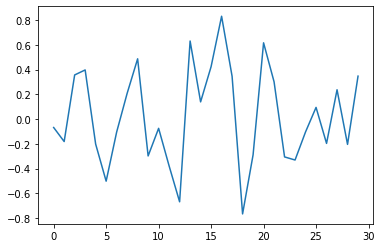

In [6]:
n_dday = len(Feb_TEC[0,0,:]) - 10
Det_TEC_data = np.zeros(l_lat*l_long*n_day).reshape(l_lat, l_long, n_day)
Det_TEC = np.zeros(l_lat*l_long*n_dday).reshape(l_lat, l_long, n_dday)
lat = 0
while lat != l_lat:
    
    for long in range(l_long):
        Det_TEC_data[lat, long, :] = detrendS(Feb_TEC[lat, long, :], 5)
    lat = lat+1
Det_TEC = Det_TEC_data[:,:,5:-5]      
plt.plot(Det_TEC[0,0,:])

In [7]:
len(Det_TEC[0,:,0])

73

In [8]:
cor_TEC = np.zeros(l_lat*l_long*n_dday).reshape(l_lat, l_long, n_dday)
r = np.zeros(l_long)
for day in range(n_dday):
    for lat in range(l_lat):
    
        autocorr(Det_TEC[lat,:,day],r)
        cor_TEC[lat, :, day] = r
        # избавляемся от начального максимума
        #cor_TEC[lat, 0, day] = np.mean(cor_TEC[lat, 1:, day])

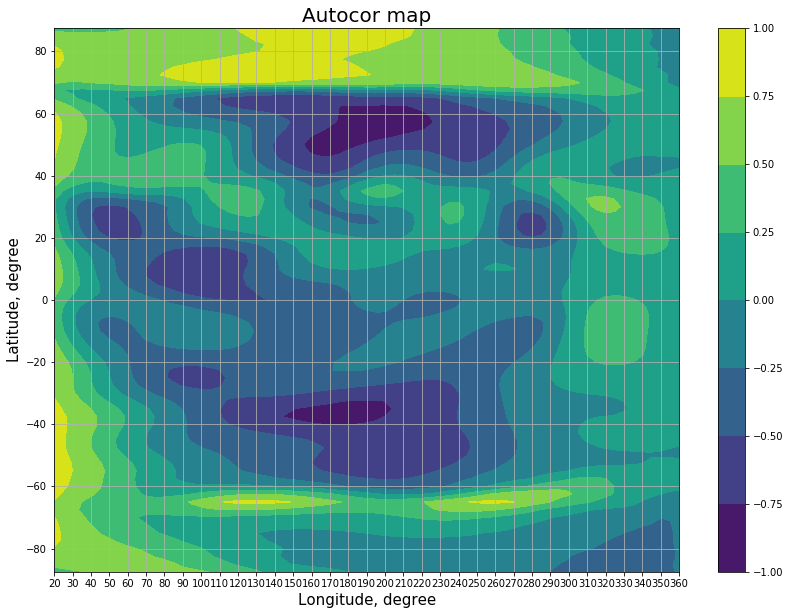

In [16]:
X = np.arange( 0, 365, 5)
Y = np.arange( 87.5, -88, -2.5)

fig, ax = plt.subplots(figsize=(14,10))
plt.contourf(X[4:], Y, cor_TEC[:,4:,20])
ax.grid()
ax.set_title('Autocor map', size = 20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.set_xlabel('Longitude, degree', size = 15)
ax.set_ylabel('Latitude, degree', size = 15)
plt.colorbar()
# размер окна легенды prop = {'size': 12}
#ax.legend(prop={'size':12})
plt.savefig('Autocor map.png')

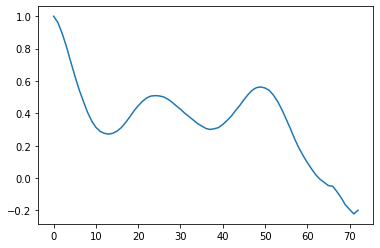

In [10]:
plt.plot(cor_TEC[62,:,20])

In [11]:
'''M = np.zeros(73)
MN = np.zeros(73)
M = cor_TEC[55,:,24]
for i in range(0, len(M)-1):
    MN[i+1] = M[i+1]-M[i]  
#plt.plot(cor_TEC[55,:,24])
plt.plot(M)
plt.plot(MN)'''

'M = np.zeros(73)\nMN = np.zeros(73)\nM = cor_TEC[55,:,24]\nfor i in range(0, len(M)-1):\n    MN[i+1] = M[i+1]-M[i]  \n#plt.plot(cor_TEC[55,:,24])\nplt.plot(M)\nplt.plot(MN)'

In [12]:
S_0 = Det_TEC[50,0,:]
S_1 = Det_TEC[60,19,:]
S_2 = Det_TEC[50,30,:]
S_3 = Det_TEC[60,43,:]
S_4 = Det_TEC[50,63,:]
S_5 = Det_TEC[50, 25, :]

S_l0 = Det_TEC[50,:,13]
S_l1 = Det_TEC[60,:,13]
nm1 = 0.5*(np.sum(S_0**2)+np.sum(S_1**2))
nm2 = 0.5*(np.sum(S_0**2)+np.sum(S_2**2))
nm3 = 0.5*(np.sum(S_0**2)+np.sum(S_3**2))
nm4 = 0.5*(np.sum(S_0**2)+np.sum(S_4**2))
nm5 = 0.5*(np.sum(S_0**2)+np.sum(S_5**2))

nml1 = 0.5*(np.sum(S_l0**2)+np.sum(S_l1**2))
cros_cor1 = np.correlate(S_0, S_1, 'full')/nm1
cor_TEC1 = cros_cor1[int(len(cros_cor1)/2):]
cros_cor2 = np.correlate(S_0, S_2, 'full')/nm2
cor_TEC2 = cros_cor2[int(len(cros_cor2)/2):]
cros_cor3 = np.correlate(S_0, S_3, 'full')/nm3
cor_TEC3 = cros_cor3[int(len(cros_cor3)/2):]
cros_cor4 = np.correlate(S_0, S_4, 'full')/nm4
cor_TEC4 = cros_cor4[int(len(cros_cor4)/2):]
cros_cor5 = np.correlate(S_0, S_5, 'full')/nm5
cor_TEC5 = cros_cor5[int(len(cros_cor5)/2):]

cros_cor_l1 = np.correlate(S_l0, S_l1, 'full')/nml1
cor_TECl1 = cros_cor_l1[int(len(cros_cor_l1)/2):]

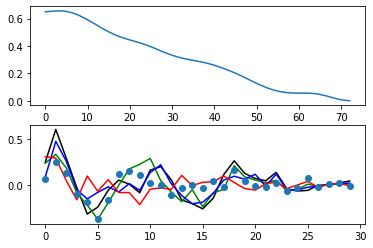

In [13]:
plt.subplot(211)
#plt.plot(cor_TEC[55,:,10])
plt.plot(cor_TECl1)
plt.subplot(212)
plt.plot(cor_TEC1, 'k')
plt.plot(cor_TEC2, 'g')
plt.plot(cor_TEC3, 'b')
plt.plot(cor_TEC4, 'r')
plt.plot(cor_TEC5, 'o')

In [14]:
"""Feb_TECU = TECU[:,:,27:67]
l_latU = len(Feb_TECU[:,0,0])
l_longU = len(Feb_TECU[0,:,0])
n_dayU = len(Feb_TECU[0,0,:])
print(l_latU, l_longU, n_dayU)

n_ddayU = len(Feb_TECU[0,0,:]) - 10
Det_TECU_data = np.zeros(l_latU*l_longU*n_dayU).reshape(l_latU, l_longU, n_dayU)
Det_TECU = np.zeros(l_latU*l_longU*n_ddayU).reshape(l_latU, l_longU, n_ddayU)
latU = 0
while latU != l_latU:
    
    for longU in range(l_longU):
        Det_TECU_data[latU, longU, :] = detrendS(Feb_TECU[latU, longU, :], 5)
    latU = latU+1
Det_TECU = Det_TECU_data[:,:,5:-5]      
plt.plot(Det_TECU[0,0,:])
"""

'Feb_TECU = TECU[:,:,27:67]\nl_latU = len(Feb_TECU[:,0,0])\nl_longU = len(Feb_TECU[0,:,0])\nn_dayU = len(Feb_TECU[0,0,:])\nprint(l_latU, l_longU, n_dayU)\n\nn_ddayU = len(Feb_TECU[0,0,:]) - 10\nDet_TECU_data = np.zeros(l_latU*l_longU*n_dayU).reshape(l_latU, l_longU, n_dayU)\nDet_TECU = np.zeros(l_latU*l_longU*n_ddayU).reshape(l_latU, l_longU, n_ddayU)\nlatU = 0\nwhile latU != l_latU:\n    \n    for longU in range(l_longU):\n        Det_TECU_data[latU, longU, :] = detrendS(Feb_TECU[latU, longU, :], 5)\n    latU = latU+1\nDet_TECU = Det_TECU_data[:,:,5:-5]      \nplt.plot(Det_TECU[0,0,:])\n'

In [15]:
"""cor_TECU = np.zeros(l_latU*l_longU*n_ddayU).reshape(l_latU, l_longU, n_ddayU)
rU = np.zeros(l_longU)
for dayU in range(n_ddayU):
    for latU in range(l_latU):
    
        autocorr(Det_TECU[latU,:,dayU],rU)
        cor_TECU[latU, :, dayU] = rU

XU = np.arange( 0, 365, 5)
YU = np.arange( -87.5, 88, 2.5)

fig, ax = plt.subplots(figsize=(14,10))
plt.contourf(XU, YU, cor_TECU[:,:,24])
ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.set_xlabel('Longitude, degree', size = 15)
ax.set_ylabel('Latitude, degree', size = 15)
plt.colorbar()
# размер окна легенды prop = {'size': 12}
#ax.legend(prop={'size':12})"""

"cor_TECU = np.zeros(l_latU*l_longU*n_ddayU).reshape(l_latU, l_longU, n_ddayU)\nrU = np.zeros(l_longU)\nfor dayU in range(n_ddayU):\n    for latU in range(l_latU):\n    \n        autocorr(Det_TECU[latU,:,dayU],rU)\n        cor_TECU[latU, :, dayU] = rU\n\nXU = np.arange( 0, 365, 5)\nYU = np.arange( -87.5, 88, 2.5)\n\nfig, ax = plt.subplots(figsize=(14,10))\nplt.contourf(XU, YU, cor_TECU[:,:,24])\nax.grid()\nax.xaxis.set_major_locator(MultipleLocator(10))\nax.set_xlabel('Longitude, degree', size = 15)\nax.set_ylabel('Latitude, degree', size = 15)\nplt.colorbar()\n# размер окна легенды prop = {'size': 12}\n#ax.legend(prop={'size':12})"